In [1]:
# imported libraries
import cv2 as cv
import matplotlib.pyplot as plt
from calculation import *
from encrypt import *

In [2]:
# read an image file
img = cv.imread('test-images/miscellaneous/4.1.04.tiff', cv.IMREAD_GRAYSCALE)
# img = cv.imread('test-images/aerials/2.1.01.tiff', cv.IMREAD_GRAYSCALE)

Text(0.5, 1.0, 'original')

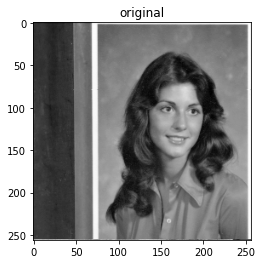

In [3]:
# showing image using matplotlib
plt.imshow(img, cmap='gray')
plt.title('original')

In [4]:
# getting image height and width
height = img.shape[0]
width = img.shape[1]
print("height: {}, width: {}".format(height, width))

height: 256, width: 256


## Bitplanes decomposition

In [5]:
# obtaining bitplanes
bitplane_images = bitplane_decomposition(img, height, width)
titles = ['bitplane8',
          'bitplane7',
          'bitplane6',
          'bitplane5',
          'bitplane4',
          'bitplane3',
          'bitplane2',
          'bitplane1']

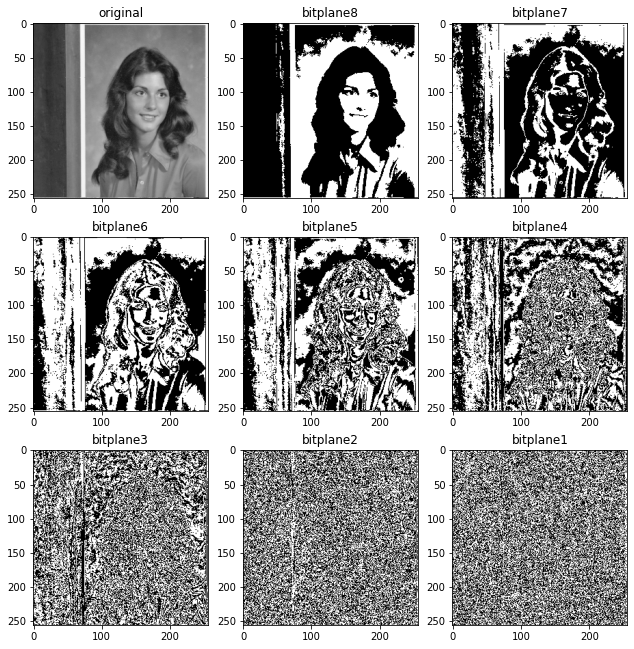

In [6]:
# viewing bitplane images
plt.subplot(3,3,1)
plt.title('original')
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

for i in range(8):
    plt.subplot(3,3,i+2)
    plt.title(titles[i])
    plt.imshow(convert_to_255(bitplane_images[i]), cmap='gray', vmin=0, vmax=255)

plt.subplots_adjust(bottom=0.1, right=1.5, top=2.2)

## Generating cipher bitplane images

In [7]:
# getting cypher images for bitplane images up to its significance level
x = 0.78
y = 0.98
u = 3.57
cipher_bitplane_images = []
for i in range(4):
    x, y, random_matrix = get_random_matrix(u, x, y, height, width)
    cipher_bitplane_image = xor_matrix(random_matrix, bitplane_images[i])
    cipher_bitplane_images.append(cipher_bitplane_image)

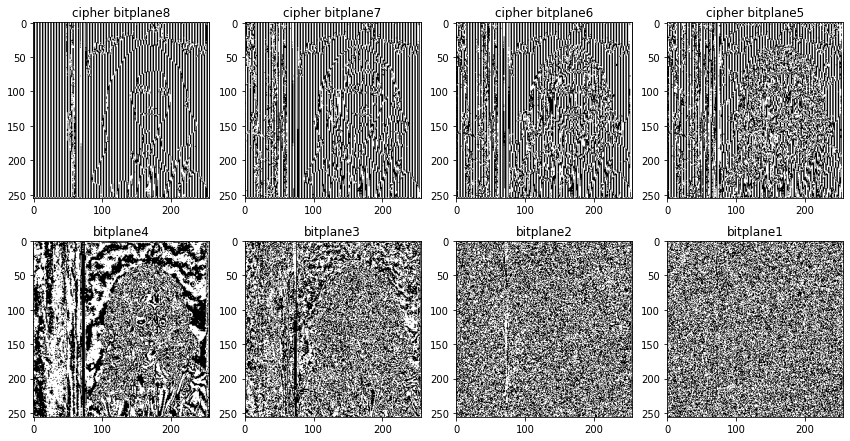

In [8]:
# cipher image composition
for i in range(len(cipher_bitplane_images)):
    bitplane_images[i] = cipher_bitplane_images[i]

titles = ['cipher bitplane8',
          'cipher bitplane7',
          'cipher bitplane6',
          'cipher bitplane5',
          'bitplane4',
          'bitplane3',
          'bitplane2',
          'bitplane1']
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.title(titles[i])
    plt.imshow(convert_to_255(bitplane_images[i]), cmap='gray', vmin=0, vmax=255)

plt.subplots_adjust(bottom=.01, right=2, top=1.4)

## Cipher image composition

In [9]:
# composition of cipher images
cipher_image = cipher_image_composition(bitplane_images, height, width)

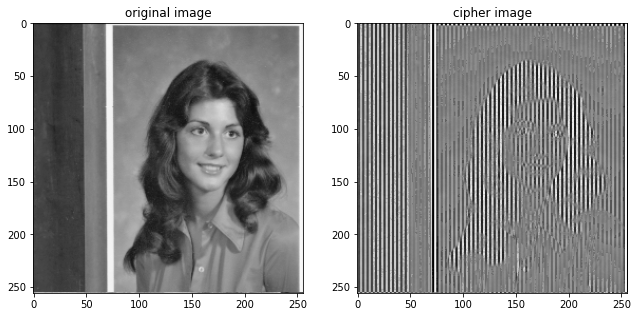

In [10]:
# displaying all cyper images
plt.subplot(1,2,1)
plt.title('original image')
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,2,2)
plt.title('cipher image')
plt.imshow(cipher_image, cmap='gray', vmin=0, vmax=255)
plt.subplots_adjust(bottom=0.1, right=1.5, top=2.2)